In [ ]:
import pandas as pd
df = pd.read_excel('Naive bayes.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mensaje   33 non-null     object
 1   Spam      33 non-null     object
 2   Etiqueta  33 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 924.0+ bytes


In [ ]:
#Librerías

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

#El modelo de Naive bayes

from sklearn.naive_bayes import MultinomialNB

#Particionar el conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split

#Librería para metricas

from sklearn.metrics import classification_report, confusion_matrix

#Tratar el texto

from sklearn.feature_extraction.text import CountVectorizer

import re

In [ ]:
#datos

df = pd.read_excel("Naive bayes.xlsx")

X = df['Mensaje'].tolist()

y = df['Etiqueta'].tolist()

Z = ['No spam','Spam']

variable = 'mensaje'

In [ ]:

#preprocesamiento

for i in range(len(X)):

  X[i] = re.sub('[^\w\s]', '', X[i])

  X[i] = X[i].lower()

vectorizer = CountVectorizer()

X_vectorized = vectorizer.fit_transform(X)

In [ ]:
#entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
#modelo

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.67      0.80         6

    accuracy                           0.71         7
   macro avg       0.67      0.83      0.65         7
weighted avg       0.90      0.71      0.76         7



<Axes: >

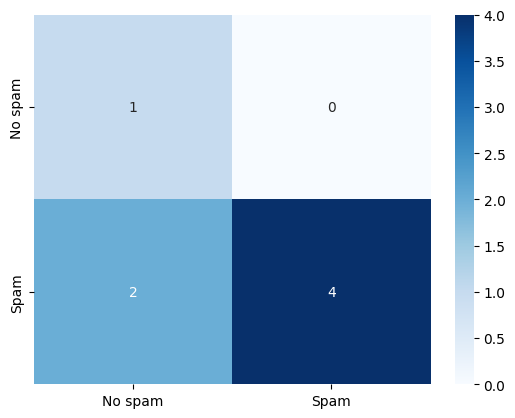

In [ ]:
#evaluar el modelo

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=Z, yticklabels=Z)

In [ ]:
#Uso

x_input = []

x_input.append(input("Ingrese el mensaje: "))

x_input_vectorized = vectorizer.transform(x_input)

y_pred = model.predict(x_input_vectorized)

if y_pred[0] == 0:

  print("El mensaje no es spam")

else:

  print("El mensaje es spam")

Ingrese el mensaje: mañana es lunes
El mensaje es spam
